<a href="https://colab.research.google.com/github/AtulChouhan0/Bike-Sharing-Demand-Prediction/blob/main/final_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error

In [ ]:
path = '/content/drive/MyDrive/Almabetter/capstone/ml_regression/bike_sharing_prediction/SeoulBikeData.csv'
df = pd.read_csv(path, encoding= 'unicode_escape')

# **Data overview**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# list of all numeric column
numeric_column = df.describe().columns.tolist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# No null value present in the dataset

# **Preprocessing the dataset**

# **Missing values check**

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# **Duplicate values**

**Duplication just means that you have repeated data in your dataset**

In [ ]:
# Checking Duplicate Values
# len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",len(df[df.duplicated()]))

The number of duplicate values in the data set is =  0


**No missing and duplicate value are present**

# **Changing the column name**

In [ ]:
df = df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

# **Extracting information from date column**

In [ ]:
# from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: dt.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
list(df['year'].unique())

[2017, 2018]

**The dataset contain data of only two years(i.e 2017, 2018)**

In [ ]:
# df['year'] = df['year'].apply(lambda x: 1 if x==2017 else 0)
# df['month'] = pd.DatetimeIndex(df['Date']).month 
# df['day'] = pd.DatetimeIndex(df['Date']).day_name()

In [ ]:
# td = pd.get_dummies(df['Hour'], prefix='Hour')
# df = pd.concat([df, td], axis=1)
# td = pd.get_dummies(df['day'], prefix='day')
# df = pd.concat([df, td], axis=1)

In [ ]:
# td = pd.get_dummies(df['month'])
# df = pd.concat([df, td], axis=1)

In [ ]:
df['weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df.drop(columns=['Date','day','year'],axis=1, inplace=True)

**We have droped year column because the data contain date is of 2017 december to 2018 november so if you consider this is a one year then we don't need the "year" column so we drop it.**

**We have droped day column day column can be divided in two catogories working day and non working day i.e weekend that's already bean extracted**

In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekend                8760 non-null   int64  
dtypes: f

# **changing data type**

In [ ]:
columns=['Hour','month','weekend']
for col in columns:
  df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekend                8760 non-null   c

# **Exploratory Data Analysis Of The DataSet**

Text(0.5, 1.0, ' Rented bikes vs Seasons ')

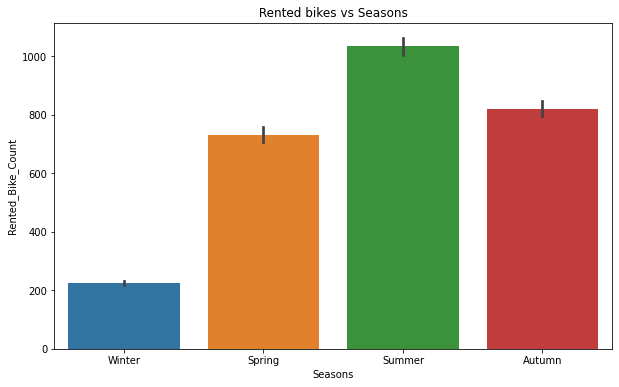

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count')
plt.title(' Rented bikes vs Seasons ')

Text(0.5, 1.0, 'Count of Rented bikes vs Month ')

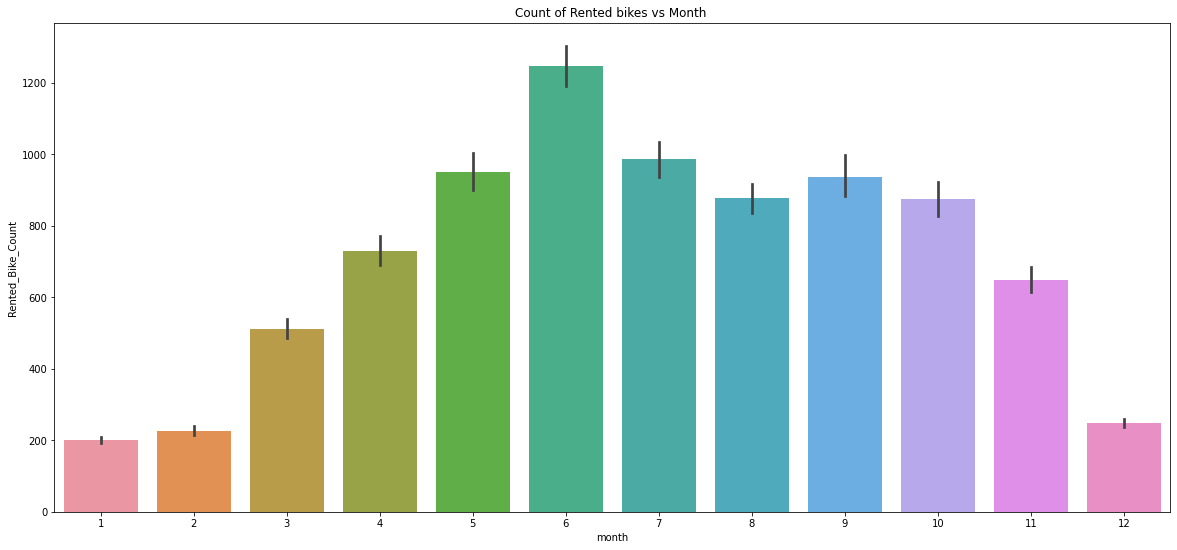

In [ ]:
plt.figure(figsize=(20,9))
sns.barplot(data=df,x='month',y='Rented_Bike_Count')
plt.title('Count of Rented bikes vs Month ')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekend ')

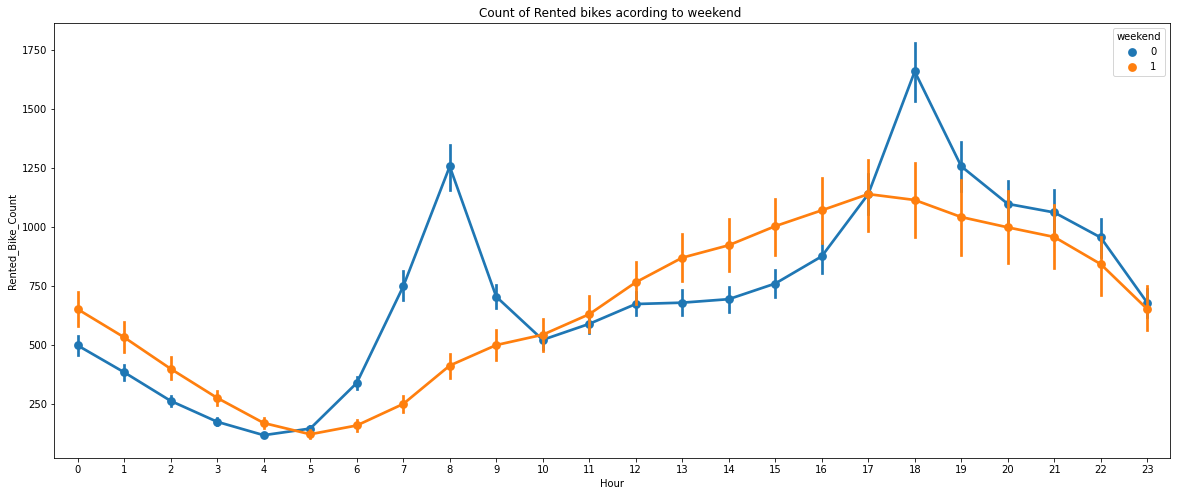

In [ ]:
plt.figure(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekend')
plt.title('Count of Rented bikes acording to weekend ')

Text(0.5, 1.0, 'Rented bikes vs Hour ')

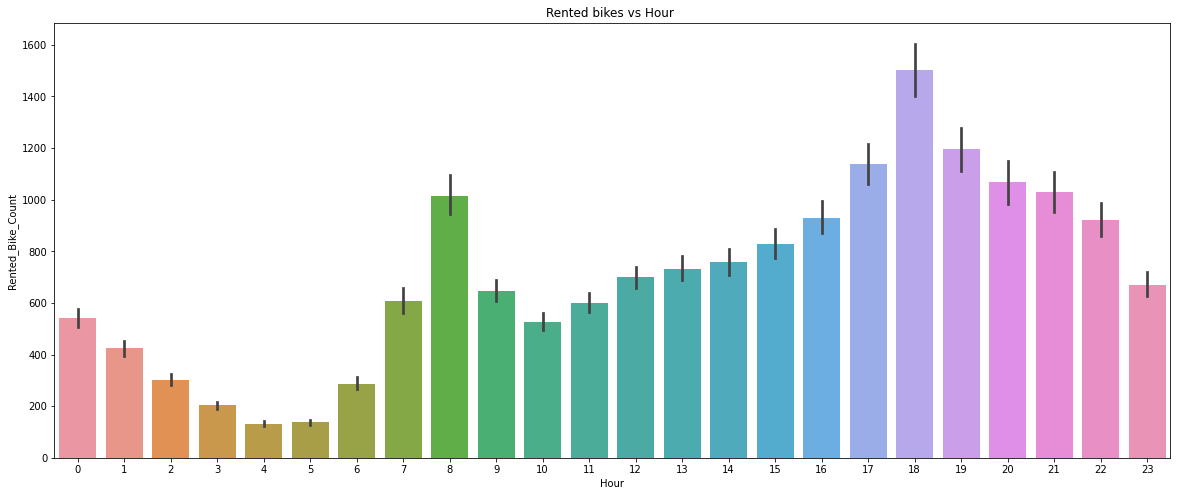

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count')
plt.title('Rented bikes vs Hour ')

Text(0.5, 1.0, 'Rented bikes vs Hour ')

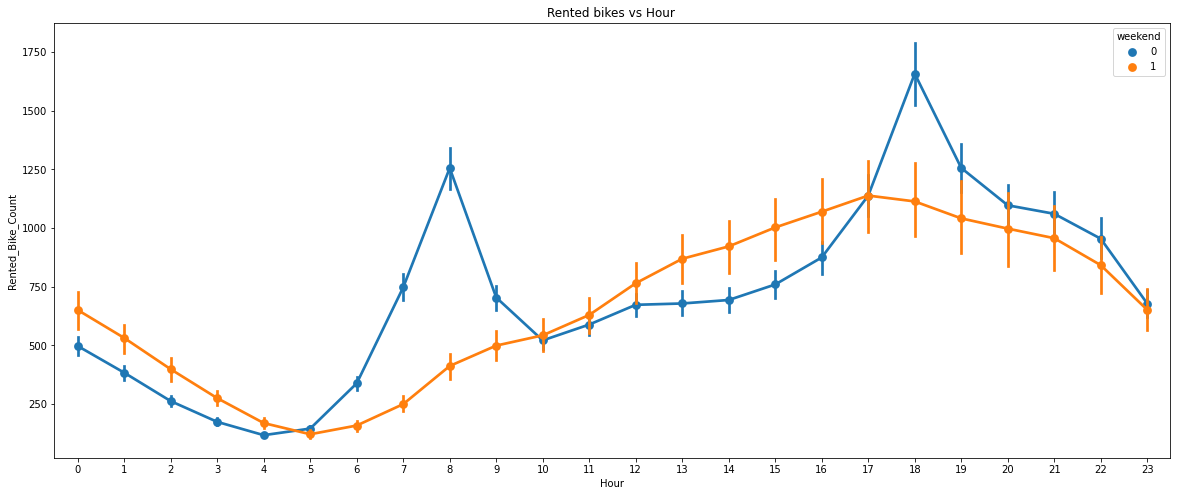

In [ ]:
plt.figure(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count', hue='weekend')
plt.title('Rented bikes vs Hour ')

Text(0.5, 1.0, 'Rented bikes vs Functioning Day ')

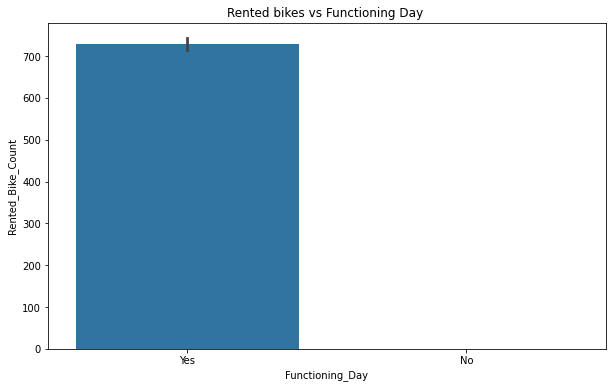

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count')
plt.title('Rented bikes vs Functioning Day ')

Text(0.5, 1.0, 'Rented bikes vs Holiday ')

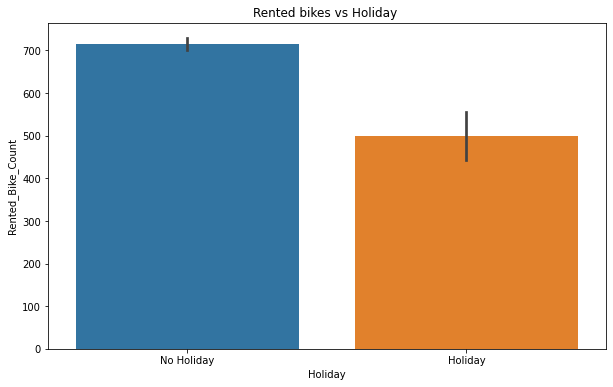

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count')
plt.title('Rented bikes vs Holiday ')

Text(0.5, 1.0, 'Rented bikes vs Functioning Day ')

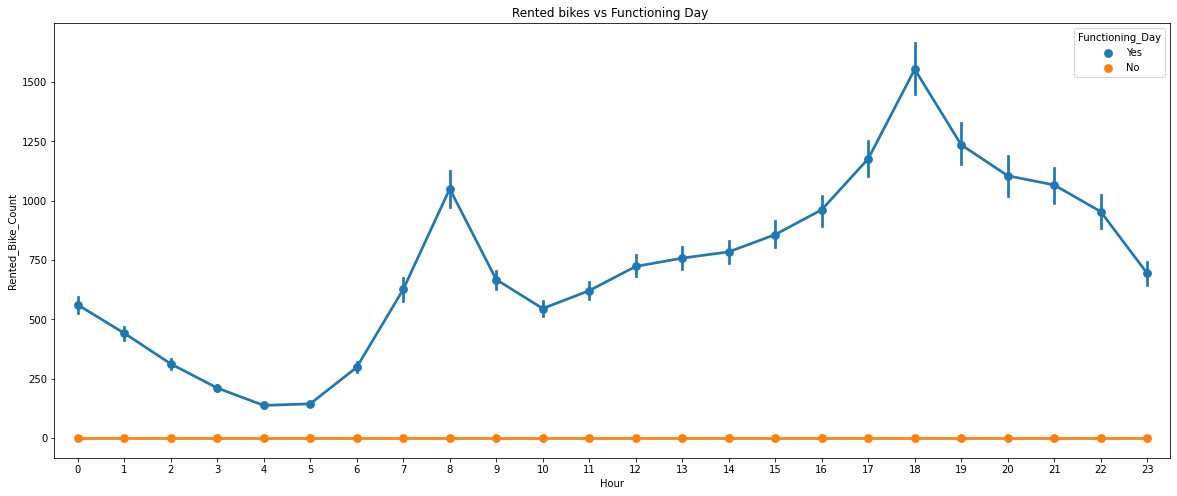

In [ ]:
plt.figure(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day')
plt.title('Rented bikes vs Functioning Day ')

Text(0.5, 1.0, 'Rented bikes vs seasons ')

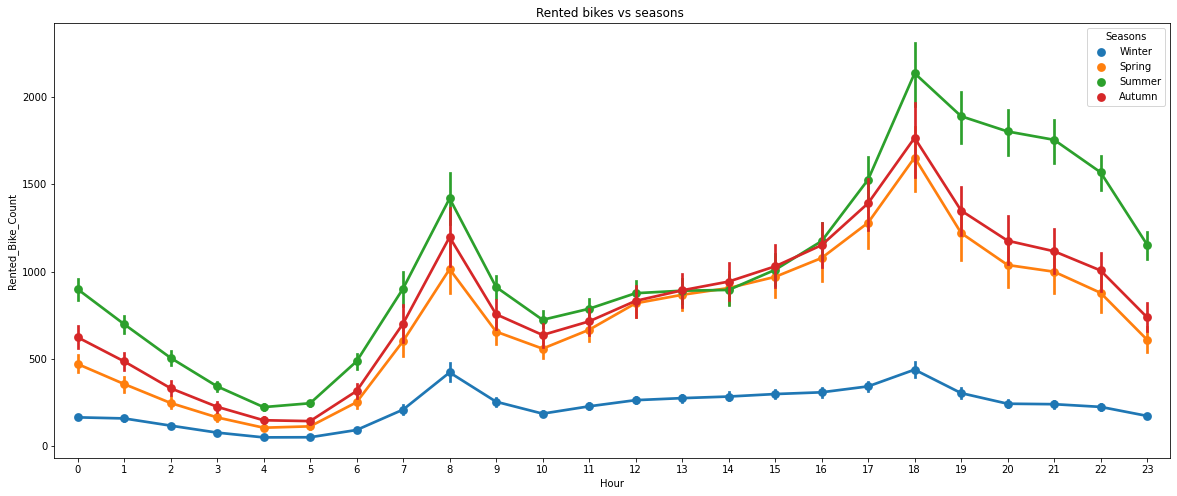

In [ ]:
plt.figure(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons')
plt.title('Rented bikes vs seasons ')

# **Analysing feature distribution**

**why : to know the skewness of the features(variable)**

In [ ]:
numerical = list(df.select_dtypes(['int64','float64']).columns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


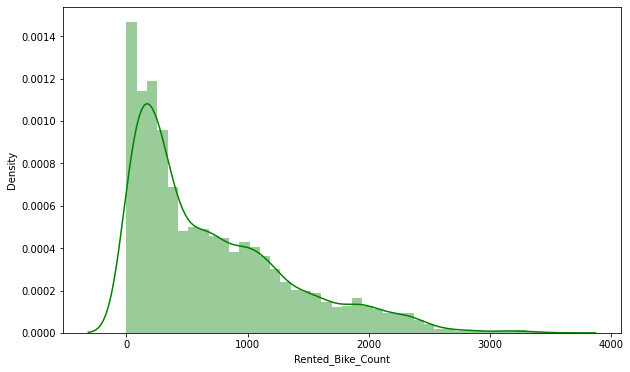

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


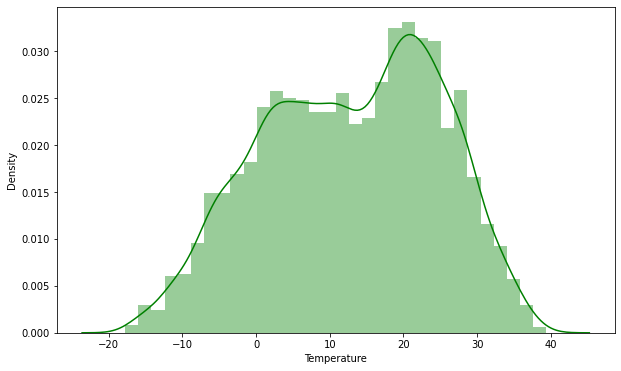

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


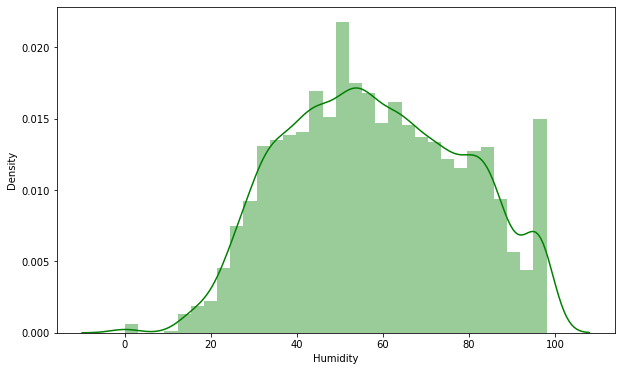

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


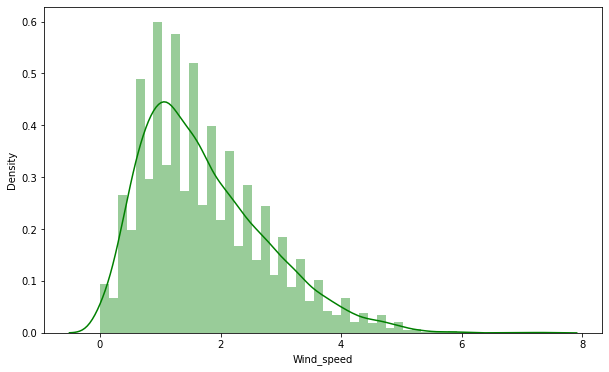

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


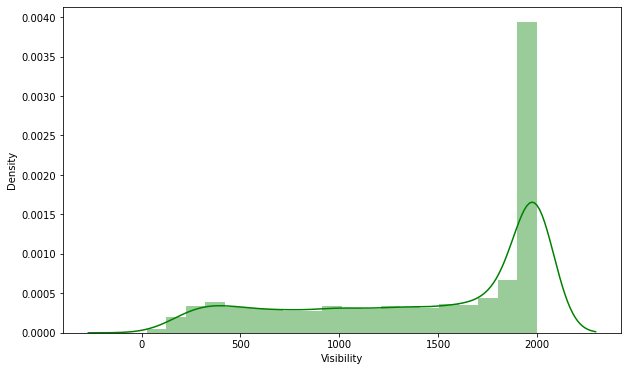

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


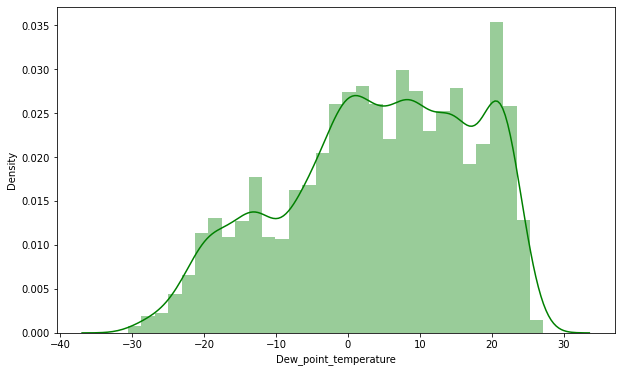

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


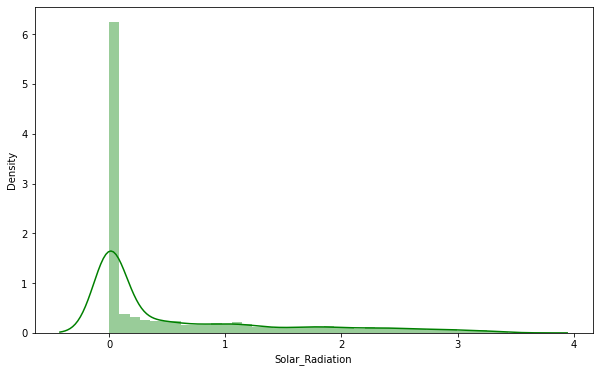

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


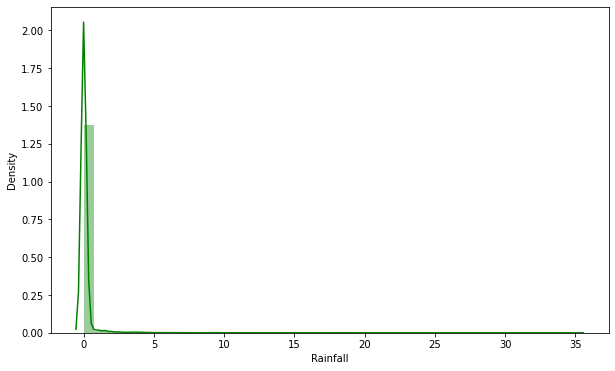

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


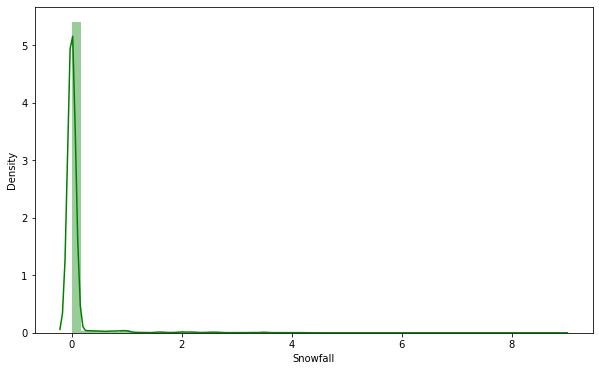

In [ ]:
for col in numerical:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col], color='g')
  plt.xlabel(col)
  plt.show()

# **Regression plot**

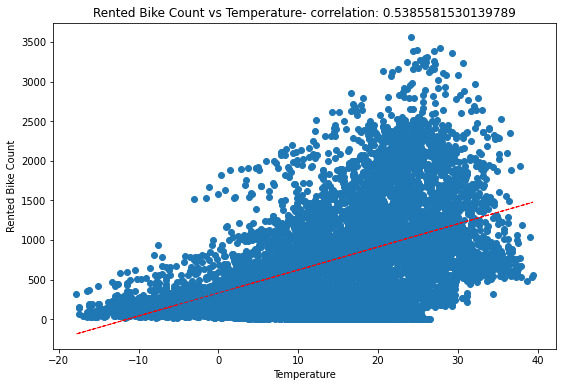

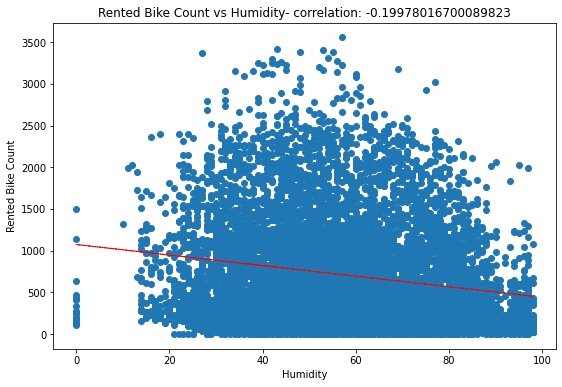

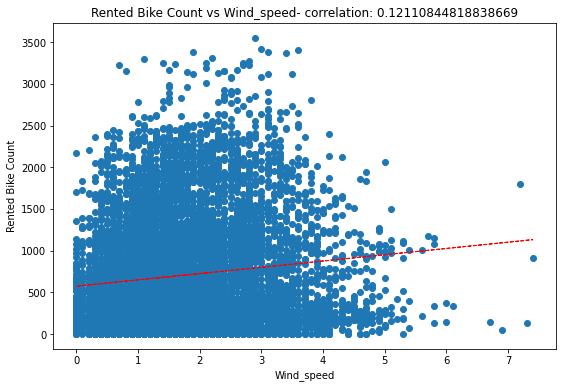

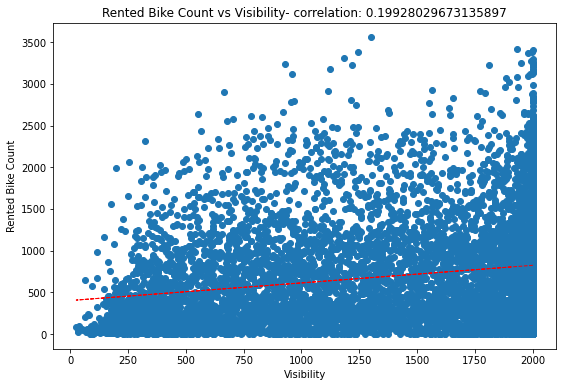

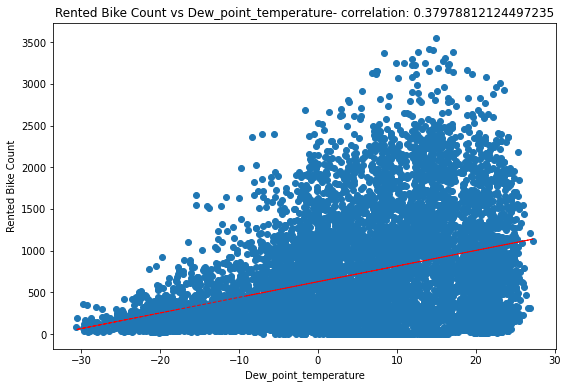

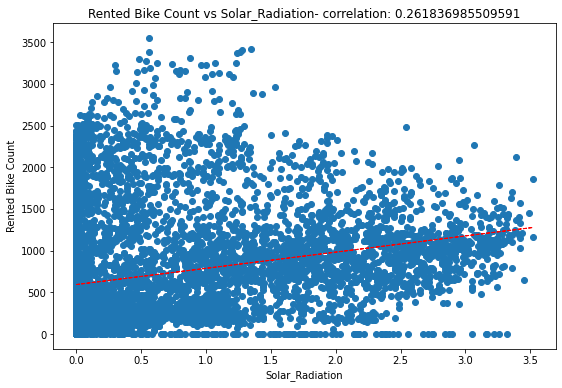

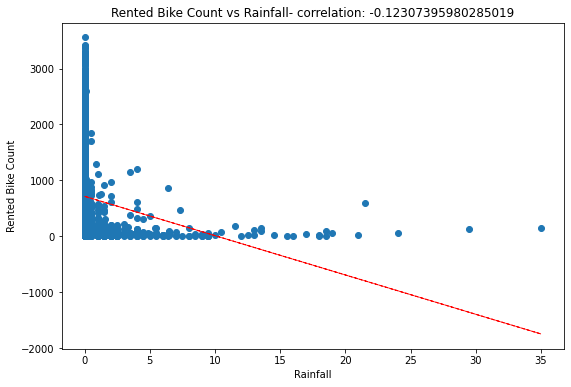

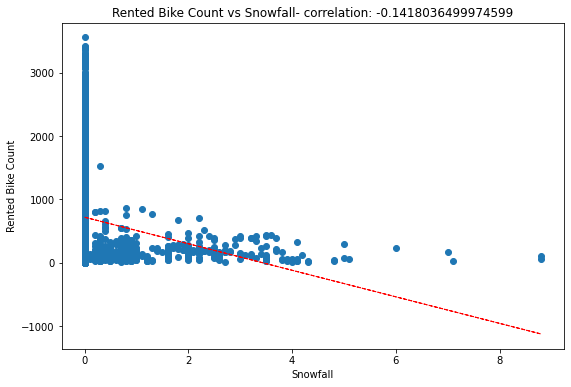

In [ ]:
for col in numerical[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# All the negative and positive correlation are shown  to get the wage idea about the relation between all independent variable and dependent variable 

# **Box plot**

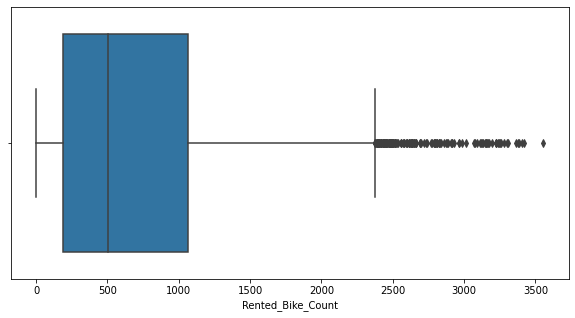

In [ ]:
# checking outlier
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()


# **Correlation Map(Heat_map)**

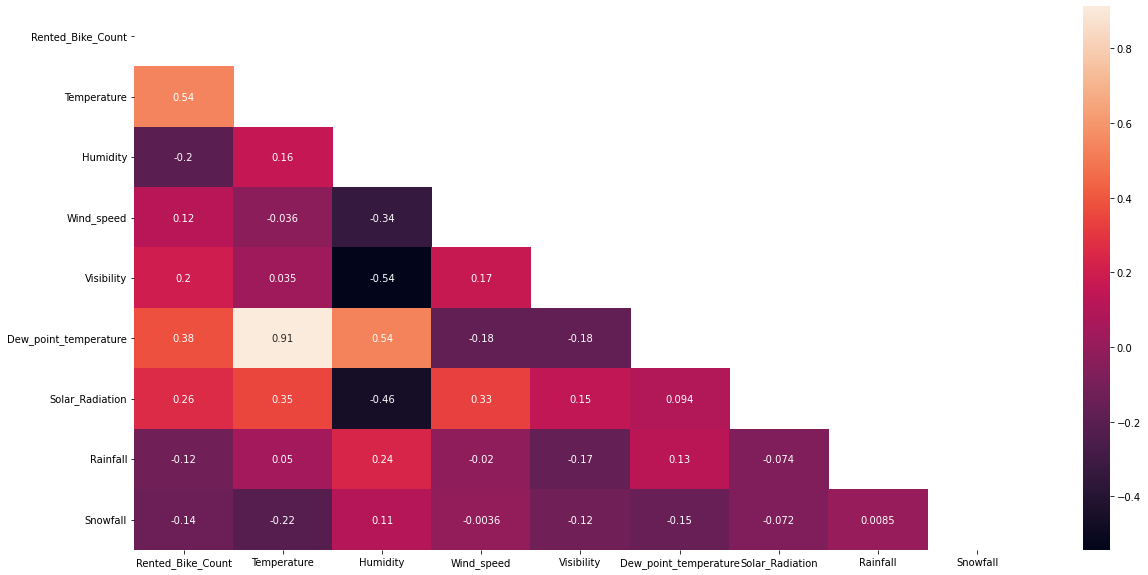

In [ ]:
plt.figure(figsize=(20,10))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True)

#**We can clearly see that :-**

**dew_point_temperature**

**and Temperature**
 
 **are heighly correlated(+ve correlation)**

**visiblity and Humidity are heighly -vely correlated**

# **VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,29.075866
1,Humidity,5.069743
2,Wind_speed,4.517664
3,Visibility,9.051931
4,Dew_point_temperature,15.201989
5,Solar_Radiation,2.821604
6,Rainfall,1.079919
7,Snowfall,1.118903


**vif should be in range of 1 to 10 clearly we need to drop heighly correlated column**

In [ ]:
df.drop(['Dew_point_temperature'], axis=1, inplace=True)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,3.166007
1,Humidity,4.758651
2,Wind_speed,4.079926
3,Visibility,4.409448
4,Solar_Radiation,2.246238
5,Rainfall,1.078501
6,Snowfall,1.118901


# **Now the vif range looks good we are ready to implement the ML regression model**

# **OneHot Encoding**

**To convert categorical variable into dummy variable column**

In [ ]:
# getting categorical variable from dataset
categorical_column=list(df.select_dtypes(['object','category']).columns)

In [ ]:
def dummy(dataset, column):
  td = pd.get_dummies(dataset[column], prefix=column)
  dataset = pd.concat([dataset, td], axis=1)
  return dataset


In [ ]:
# copy
new = df.copy()

In [ ]:
for i in categorical_column:
  new = dummy(new, i)

In [ ]:
new.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_0,weekend_1
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
new.drop(categorical_column, axis=1, inplace=True)

In [ ]:
new.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_0,weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# **Model implementation**

In [ ]:
x = new.drop(['Rented_Bike_Count'], axis=1)
# new.drop(['Rented_Bike_Count'], inplace=True, axis=1)
y = np.sqrt(new['Rented_Bike_Count']) # as we know that range of rented bike count is very large so we applyed transformation 

In [ ]:
x.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_0,weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

# **Test train split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)

(6570, 53)
(2190, 53)


# **Linear Regression**

#Most basic M.L model


#There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

--No multicollinearity in the dataset.

--Independent variables should show linear relationship with dv.

--Residual mean should be 0 or close to 0.

--There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(x_train, y_train)

In [ ]:
#model score
reg.score(x_train, y_train)

0.7722101540678412

In [ ]:
#model coefficeint
reg.coef_

array([ 5.11537424e-01, -1.27234923e-01, -2.90145805e-02,  9.91157732e-04,
        8.89700762e-01, -1.48171255e+00, -8.13637832e-02,  4.58345875e+08,
        4.58345873e+08,  4.58345870e+08,  4.58345868e+08,  4.58345866e+08,
        4.58345866e+08,  4.58345871e+08,  4.58345878e+08,  4.58345883e+08,
        4.58345877e+08,  4.58345872e+08,  4.58345872e+08,  4.58345873e+08,
        4.58345872e+08,  4.58345872e+08,  4.58345873e+08,  4.58345875e+08,
        4.58345879e+08,  4.58345886e+08,  4.58345882e+08,  4.58345881e+08,
        4.58345882e+08,  4.58345880e+08,  4.58345877e+08, -4.05601532e+09,
        3.94754925e+08,  9.22306079e+09, -3.47906973e+09, -8.88924430e+08,
       -8.88924426e+08,  1.53515884e+09,  1.53515887e+09,  5.84730816e+08,
        5.84730816e+08, -3.28909383e+09, -3.28909383e+09, -3.28909383e+09,
       -1.21173997e+10, -1.21173997e+10, -1.21173997e+10,  1.16167642e+09,
        1.16167642e+09,  1.16167642e+09,  5.84730818e+08, -4.45302775e+08,
       -4.45302777e+08])

In [ ]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 35.077512998569425
RMSE : 5.9226272040851455
MAE : 4.4740422173338565
R2 : 0.7722101540678412
Adjusted R2 : 0.7665580651940564


In [ ]:
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

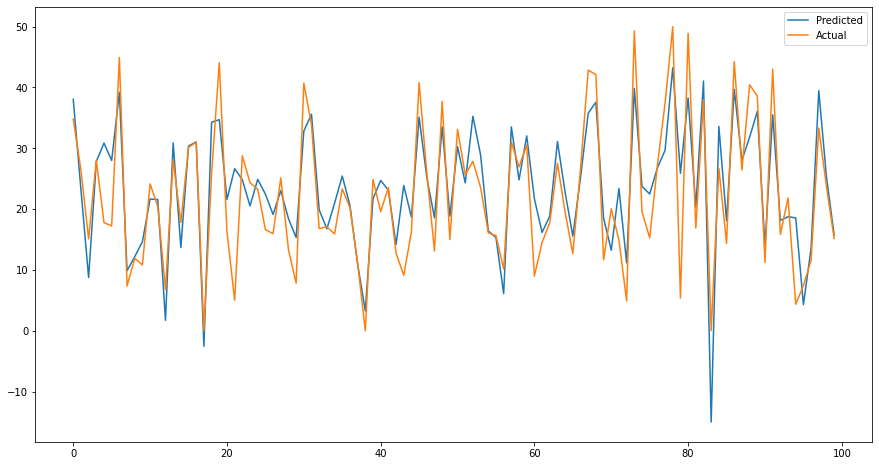

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_test[200:300])
plt.plot(np.array(y_test[200:300]))
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing regularization**

# i.e tuning the parameters of the model with the help of hyperparameter(alpha, no. of iteration)

# **Lasso**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 35.07752396970736
RMSE : 5.922628130290417
MAE : 4.474047285132368
R2 : 0.7722100828223736
Adjusted R2 : 0.7665579921807939


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

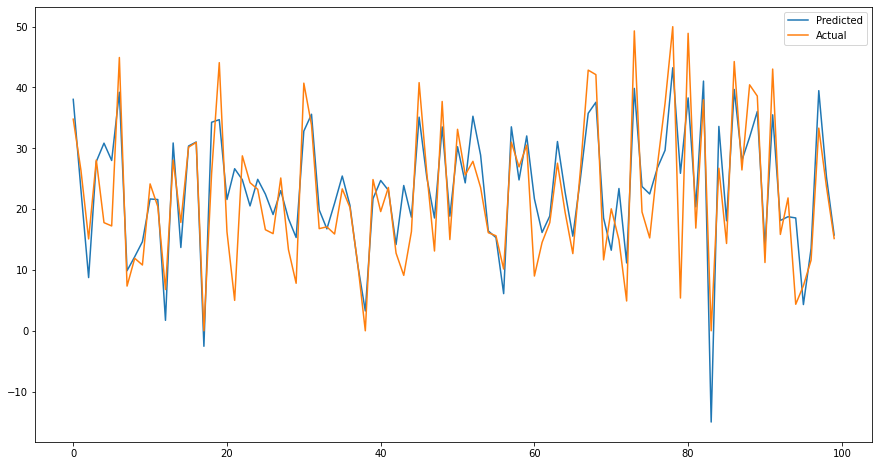

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_test_lasso[200:300])
plt.plot(np.array(y_test[200:300]))
plt.legend(["Predicted","Actual"])
plt.show()

# **Ridge**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.80865e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.80108e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.88849e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.81832e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-condit

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge.score(x_train, y_train)

-35.078136174806644

In [ ]:
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 35.078136174806644
RMSE : 5.922679813632225
MAE : 4.474831316083193
R2 : 0.7722061072239539
Adjusted R2 : 0.7665539179369079


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

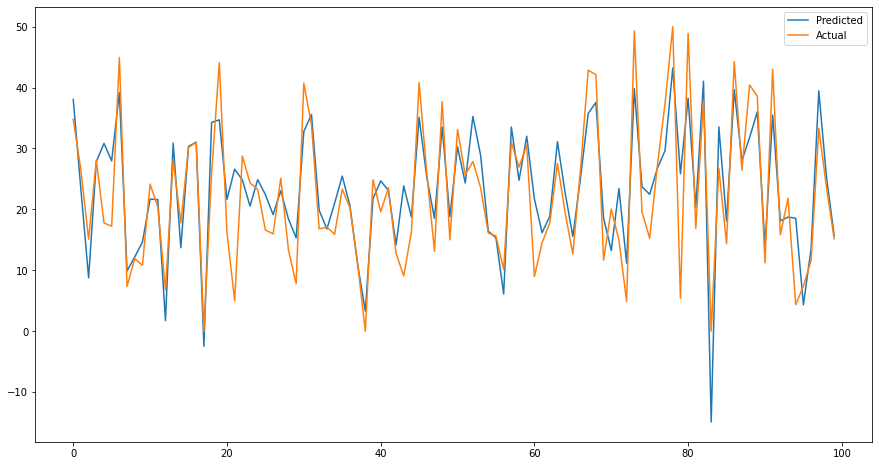

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_test_ridge[200:300])
plt.plot(np.array(y_test[200:300]))
plt.legend(["Predicted","Actual"])
plt.show()

# **ELASTIC NET**

# Ridge + Lasso = ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# score
elasticnet.score(x_train, y_train)

0.6559023422953525

In [ ]:
y_pred_train_en=elasticnet.predict(x_train)
y_pred_test_en=elasticnet.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 52.987831883019176
RMSE : 7.279274131602627
MAE : 5.607820103665487
R2 : 0.6559023422953525
Adjusted R2 : 0.6473643386163515


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)


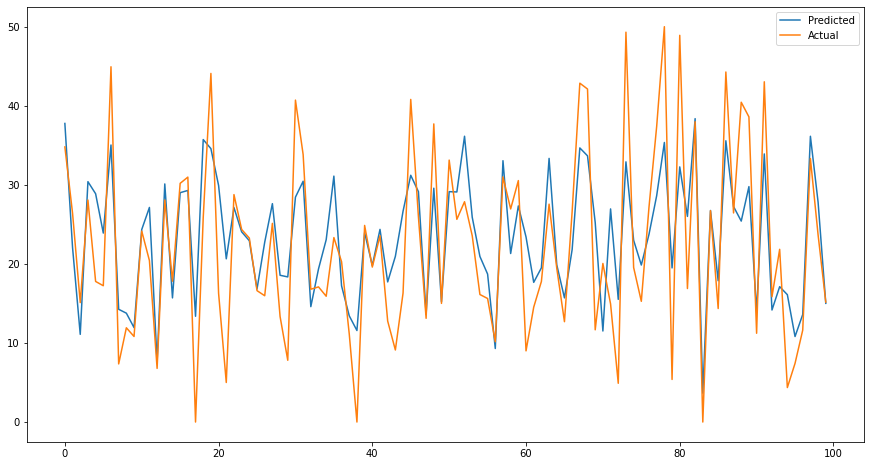

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_test_en[200:300])
plt.plot(np.array(y_test[200:300]))
plt.legend(["Predicted","Actual"])
plt.show()

# **SVM (support vector machine)**



**kernel = 'rbf'**

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)
# y_pred_test_svr = svr.predict(x_test)

SVR()

In [ ]:
# score
# svr.score(x_train, y_train)

In [ ]:
y_pred_train_svr=svr.predict(x_train)
y_pred_test_svr=svr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_svr))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_svr)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_svr)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_svr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 140.71554768323855
RMSE : 11.86235843680499
MAE : 9.80545492295386
R2 : 0.08620736799865203
Adjusted R2 : 0.06353367441434898


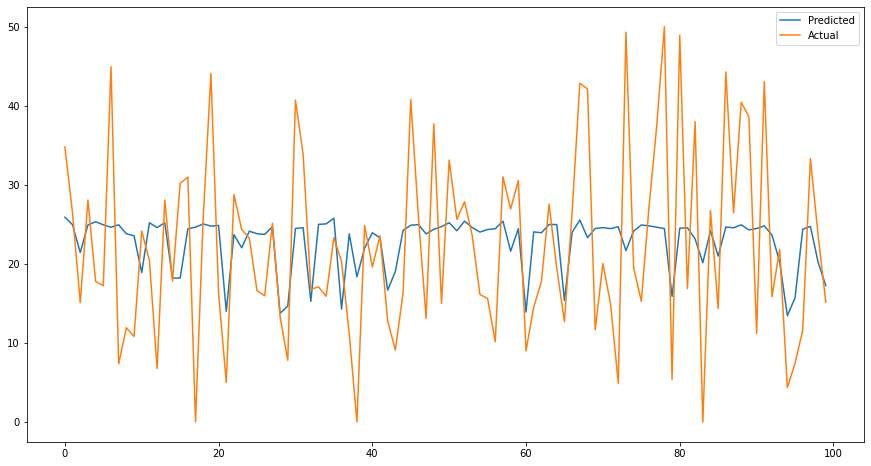

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_test_svr[200:300])
plt.plot(np.array(y_test[200:300]))
plt.legend(["Predicted","Actual"])
plt.show()

# Hence svm with kernal trick not always outperform the regression model

# perticularly in this case kernal='rbf' is able to capture only 8% of the variace of the data that means worst model

# **Kernal='linear'**

In [ ]:
svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)
y_pred_train_svr=svr.predict(x_train)
y_pred_test_svr=svr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_svr))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_svr)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_svr)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_svr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 40.93355714508648
RMSE : 6.3979338184359555
MAE : 4.944313631955972
R2 : 0.7341815916107068
Adjusted R2 : 0.7275859101291373


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'SVM (kernel) ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

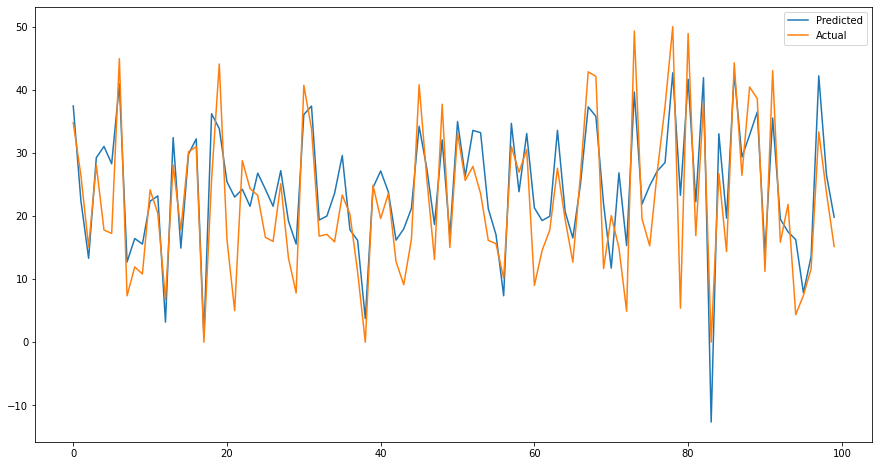

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_test_svr[200:300])
plt.plot(np.array(y_test[200:300]))
plt.legend(["Predicted","Actual"])
plt.show()

# SVM with kernel='linear' captured 72% accuracy(i.e r_square score)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_rf))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 12.120575429745571
RMSE : 3.4814616800627824
MAE : 2.1724688159056256
R2 : 0.9232711818900445
Adjusted R2 : 0.9213673301298256


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

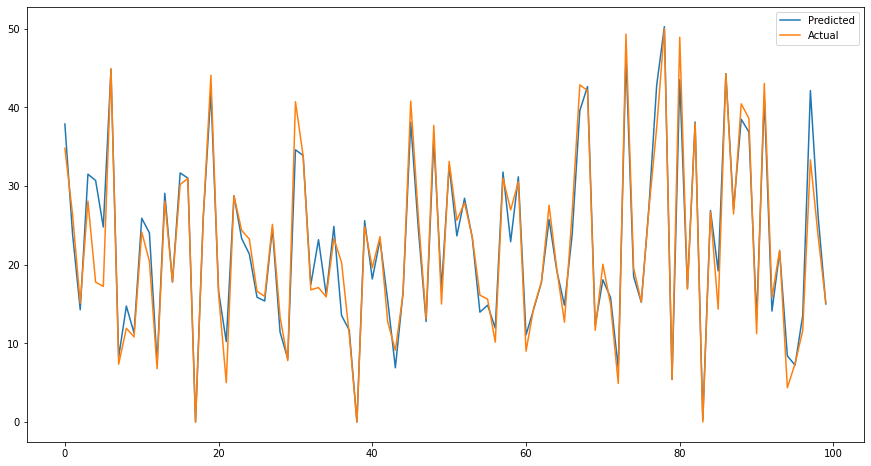

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_test_rf[200:300])
plt.plot(np.array(y_test[200:300]))
plt.legend(["Predicted","Actual"])
plt.show()

# Random Forest has captured 91% accuracy(i.e r_square score)

# **XGBoost**
# With hyperparameter tuning

In [ ]:
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()


# Setting up hyperparameters for the model
# Input--> range of values so that model can try all the possible combination of the hyperparameters

In [ ]:
# Number of trees
# Maximum depth of trees
# Minimum number of samples required to split a node
# Minimum number of samples required at each leaf node

param_dict = {'n_estimators' : [100, 120],
              'max_depth' : [8,9],
              'min_samples_split' : [50,100],
              'min_samples_leaf' : [40,50]}

# i have tried multiple values but i have shown very few of those in the above dict.. because i takes lot of time to run or debug the code

In [ ]:
# Grid search
grid = GridSearchCV(estimator=xgb,param_grid = param_dict,verbose=2)

In [ ]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[17:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.0s
[17:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.9s
[17:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.9s
[17:19:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.8s
[17:19:35] WARNING: /wo

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'max_depth': [8, 9], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 120]},
             verbose=2)

In [ ]:
grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 120}

In [ ]:
grid = grid.best_estimator_

In [ ]:
y_pred_train_xgb = grid.predict(x_train)
y_pred_xgb = grid.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",grid.score(x_train,y_train))
MSE_xgb= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :",MSE_xgb)

RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_xgb)


MAE_xgb= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_xgb)


from sklearn.metrics import r2_score
r2_xgb= r2_score(y_train, y_pred_train_xgb)
print("R2 :",r2_xgb)
Adjusted_R2_xgb = (1-(1-r2_score(y_train, y_pred_train_xgb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xgb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.9840906687473
MSE : 2.44988871883839
RMSE : 1.565212036383055
MAE : 1.0620242874220849
R2 : 0.9840906687473
Adjusted R2 : 0.983695914741498


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_xgb),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_xgb),3),
       'R2_score':round((r2_xgb),3),
       'Adjusted R2':round((Adjusted_R2_xgb ),3),
       }
training_df=training_df.append(dict1,ignore_index=True)

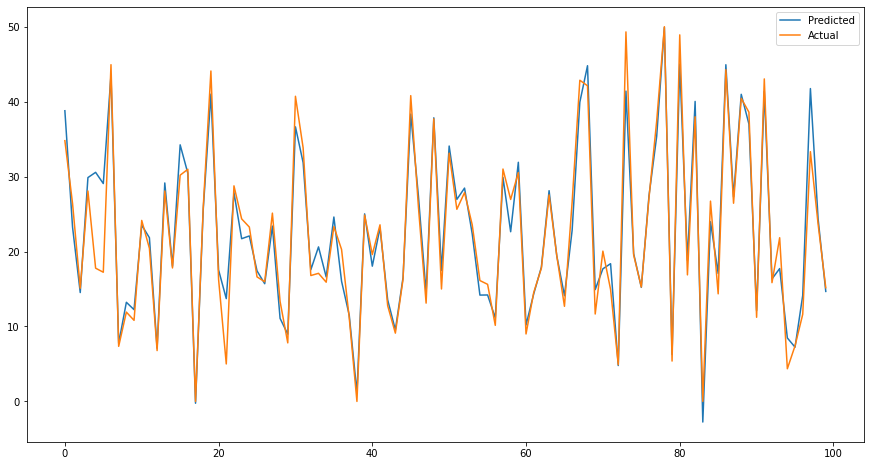

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_xgb[200:300])
plt.plot(np.array(y_test[200:300]))
plt.legend(["Predicted","Actual"])
plt.show()

# **Important column**

In [ ]:
features = x_train.columns
importances = grid.feature_importances_
indices = np.argsort(importances)

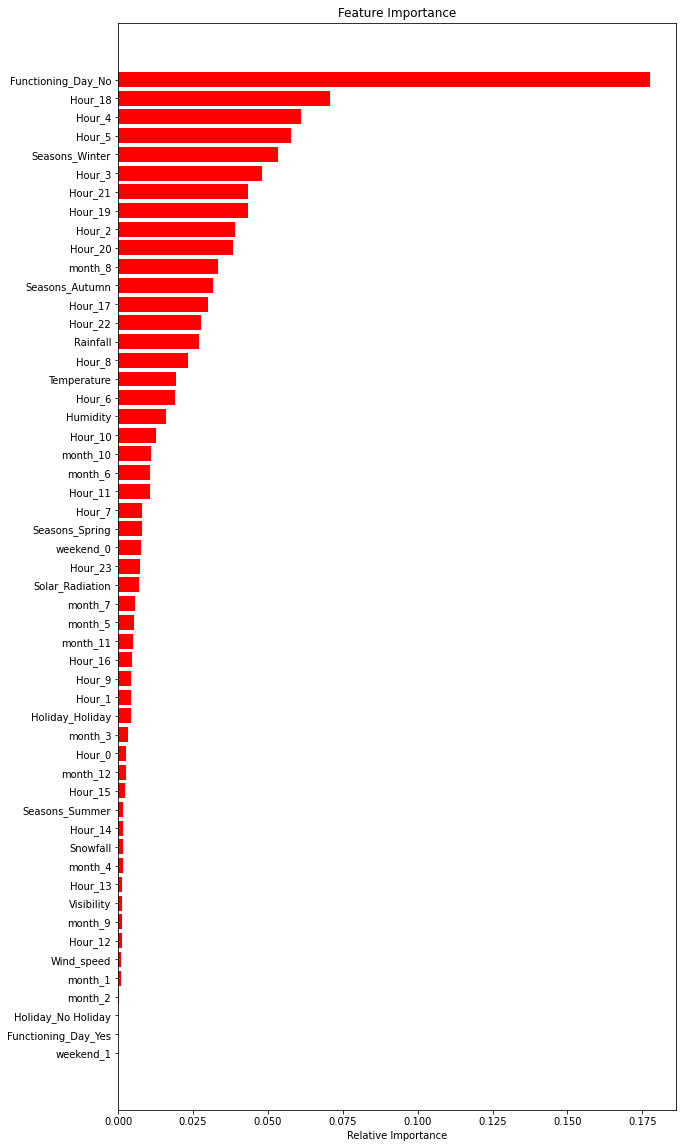

In [ ]:
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# XGboost has captured 98% accuracy(i.e r_square score)

# **Summary**

In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,35.078,5.923,0.772,0.770
1,Lasso regression,4.474,35.078,5.923,0.772,0.770
2,Ridge regression,4.475,35.078,5.923,0.772,0.770
3,Elastic net regression,5.608,52.988,7.279,0.656,0.650
4,SVM (kernel),4.944,40.934,6.398,0.734,0.650
5,Random forest regression,2.172,12.121,3.481,0.923,0.920
6,Gradient boosting regression,1.062,2.450,1.565,0.984,0.984


# **Conclution**

I have implemented 6 machine learning algorithms Linear Regression,lasso,ridge,elasticnet, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are



1.   Random forest
2.   xgboost

this both model got the heigest accuracy(i.e r_square_value) 

i.e these models have captured maximum variance from the data set

with highest R2 score of 92% and 98% recpectively

